In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_csv("D:/Users/Dada/Downloads/total_data_11_27.csv", encoding = 'utf-8-sig')
df = df.dropna()
df['score'].value_counts()

1    82598
0    10218
Name: score, dtype: int64

In [14]:
from konlpy.tag import Okt

okt = Okt()

positive = df[df['score']==1]
negative = df[df['score']==0]

pos_words = []
neg_words = []

for i, row in positive.iterrows():
    pos_words.append([token for token in okt.pos(row[0])])

for i, row in negative.iterrows():
    neg_words.append([token for token in okt.pos(row[0])])

In [15]:
pos_words = [d for token in pos_words for d in token]
pos_words[0:10]

[('마퍼디였', 'Noun'),
 ('을', 'Josa'),
 ('때', 'Noun'),
 ('도', 'Josa'),
 ('맛있었는데', 'Adjective'),
 ('껠끄쇼즈', 'Noun'),
 ('최근', 'Noun'),
 ('2', 'Number'),
 ('번', 'Noun'),
 ('방문', 'Noun')]

In [16]:
neg_words = [d for token in neg_words for d in token]
neg_words[0:10]

[('시', 'Modifier'),
 ('그니', 'Noun'),
 ('쳐인', 'Verb'),
 ('바닐라', 'Noun'),
 ('타르트', 'Noun'),
 ('를', 'Josa'),
 ('먹어', 'Verb'),
 ('봤다', 'Verb'),
 ('당', 'Modifier'),
 ('도도', 'Noun')]

In [17]:
pos_token = []
for w in pos_words:
        if w[1] in ["Noun", "Verb"]:
            pos_token.append(w[0])
            
neg_token = []
for w in neg_words:
        if w[1] in ["Noun", "Verb"]:
            neg_token.append(w[0])

In [19]:
from collections import Counter

pos_count = Counter(pos_token)
pos_dict = dict(pos_count.most_common())

neg_count = Counter(neg_token)
neg_dict = dict(neg_count.most_common())

print(len(pos_dict))
print(len(neg_dict))

76278
31637


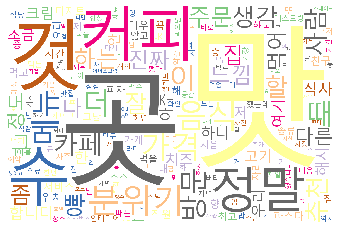

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(pos_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

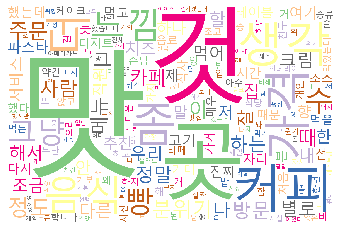

In [21]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(neg_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()